In [7]:
import keras
from keras import layers
import os
import numpy as np
from PIL import Image 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

image_folder = './Pikachu images\\FilteredImages'
image_size = (128, 128)

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Load and ensure RGB format
    img = img.resize(image_size)
    img_array = np.asarray(img)
    return img_array / 255.0  # Normalize


X = []  # List to hold image data
y = []  # List to hold labels

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)

    if filename.startswith('pikachu'):
        label = 1  # Assign label 1 for Pikachu
    elif filename.startswith('not_pikachu'):
        label = 0  # Assign label 0 for not Pikachu
    else:
        continue  # Skip any files not matching the pattern

    img_array = load_and_preprocess_image(img_path)
    X.append(img_array)
    y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)


In [8]:
model = Sequential([
    Conv2D(6, (3, 3), activation='selu', input_shape=(128, 128, 3)),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='selu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(120, activation='selu'),
    Dense(64, activation='selu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
32/32 [==============================] - 4s 67ms/step - loss: 1.4359 - accuracy: 0.6874 - val_loss: 0.4974 - val_accuracy: 0.8120
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 0.3573 - accuracy: 0.8407 - val_loss: 0.4631 - val_accuracy: 0.8280
Epoch 3/20
32/32 [==============================] - 1s 41ms/step - loss: 0.2921 - accuracy: 0.8657 - val_loss: 0.5123 - val_accuracy: 0.8080
Epoch 4/20
32/32 [==============================] - 1s 40ms/step - loss: 0.2326 - accuracy: 0.9058 - val_loss: 0.7006 - val_accuracy: 0.7000
Epoch 5/20
32/32 [==============================] - 1s 39ms/step - loss: 0.2099 - accuracy: 0.9088 - val_loss: 0.4688 - val_accuracy: 0.8240
Epoch 6/20
32/32 [==============================] - 1s 39ms/step - loss: 0.1639 - accuracy: 0.9419 - val_loss: 0.4888 - val_accuracy: 0.8400
Epoch 7/20
32/32 [==============================] - 1s 39ms/step - loss: 0.1241 - accuracy: 0.9529 - val_loss: 0.5723 - val_accuracy: 0.8240
Epoch 8/20
32

In [9]:
import matplotlib.pyplot as plt

predictions = model.predict(X)

for i in range(len(predictions)):
    predicted_class = np.round(predictions[i]).astype(int)[0] 
    true_class = y[i]

    if predicted_class == 1 and true_class == 0:
        image_array = X[i] 
        plt.imshow(image_array)
        plt.title('Misclassified as Pikachu')
        plt.show()

39/39 [==============================] - 1s 11ms/step


Shape of image_data: (1, 128, 128, 3)
Expected input shape of model: (None, 128, 128, 3)
1/1 [==============================] - 0s 33ms/step
0
The image is predicted to be NOT Pikachu.


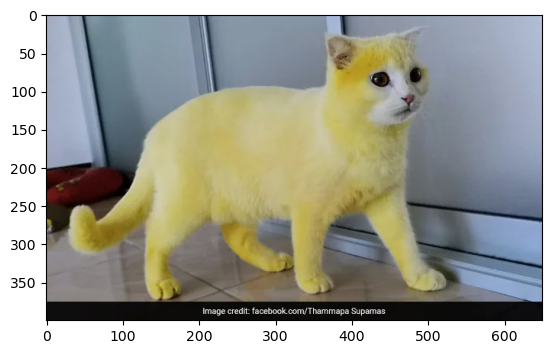

Shape of image_data: (1, 128, 128, 3)
Expected input shape of model: (None, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
0
The image is predicted to be NOT Pikachu.


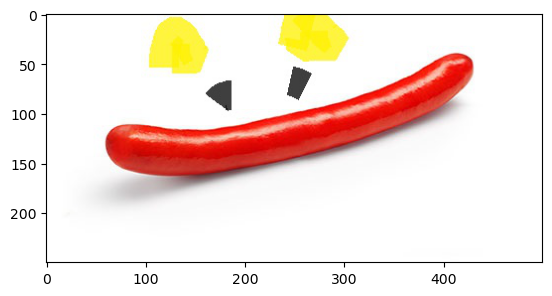

Shape of image_data: (1, 128, 128, 3)
Expected input shape of model: (None, 128, 128, 3)
1/1 [==============================] - 0s 32ms/step
1
The image is predicted to be Pikachu!


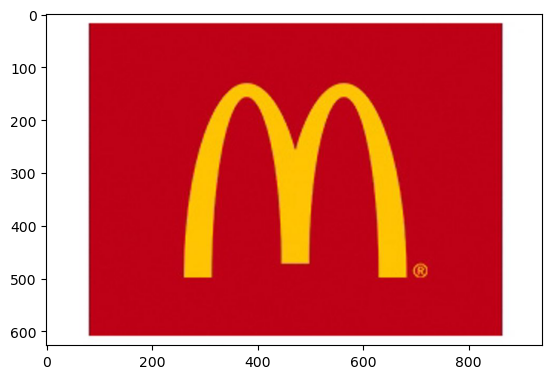

In [12]:
def imagesTest(image_path):
    image_data = load_and_preprocess_image(image_path)
    image_data = np.expand_dims(image_data, axis=0)
    # Ovenstående er tilføjet for at få det til at passe med dimensionerne af input til modellen

    print(f"Shape of image_data: {image_data.shape}")
    print(f"Expected input shape of model: {model.input_shape}")
    
    prediction = model.predict(image_data)
    predicted_class = np.round(prediction).astype(int)[0][0]
    print(predicted_class)

    if predicted_class == 1:
        print("The image is predicted to be Pikachu!")
    else:
        print("The image is predicted to be NOT Pikachu.")

    # Display the image
    img = Image.open(image_path)  # Load the original image
    plt.imshow(img)
    plt.show()

image_path = './test.jpg'
image_path2 = './test2.jpg'
image_path3 = './test3.jpg'

imagesTest(image_path)
imagesTest(image_path2)
imagesTest(image_path3)
